# Airlines Passenger Satisfaction
## Rohan Patil

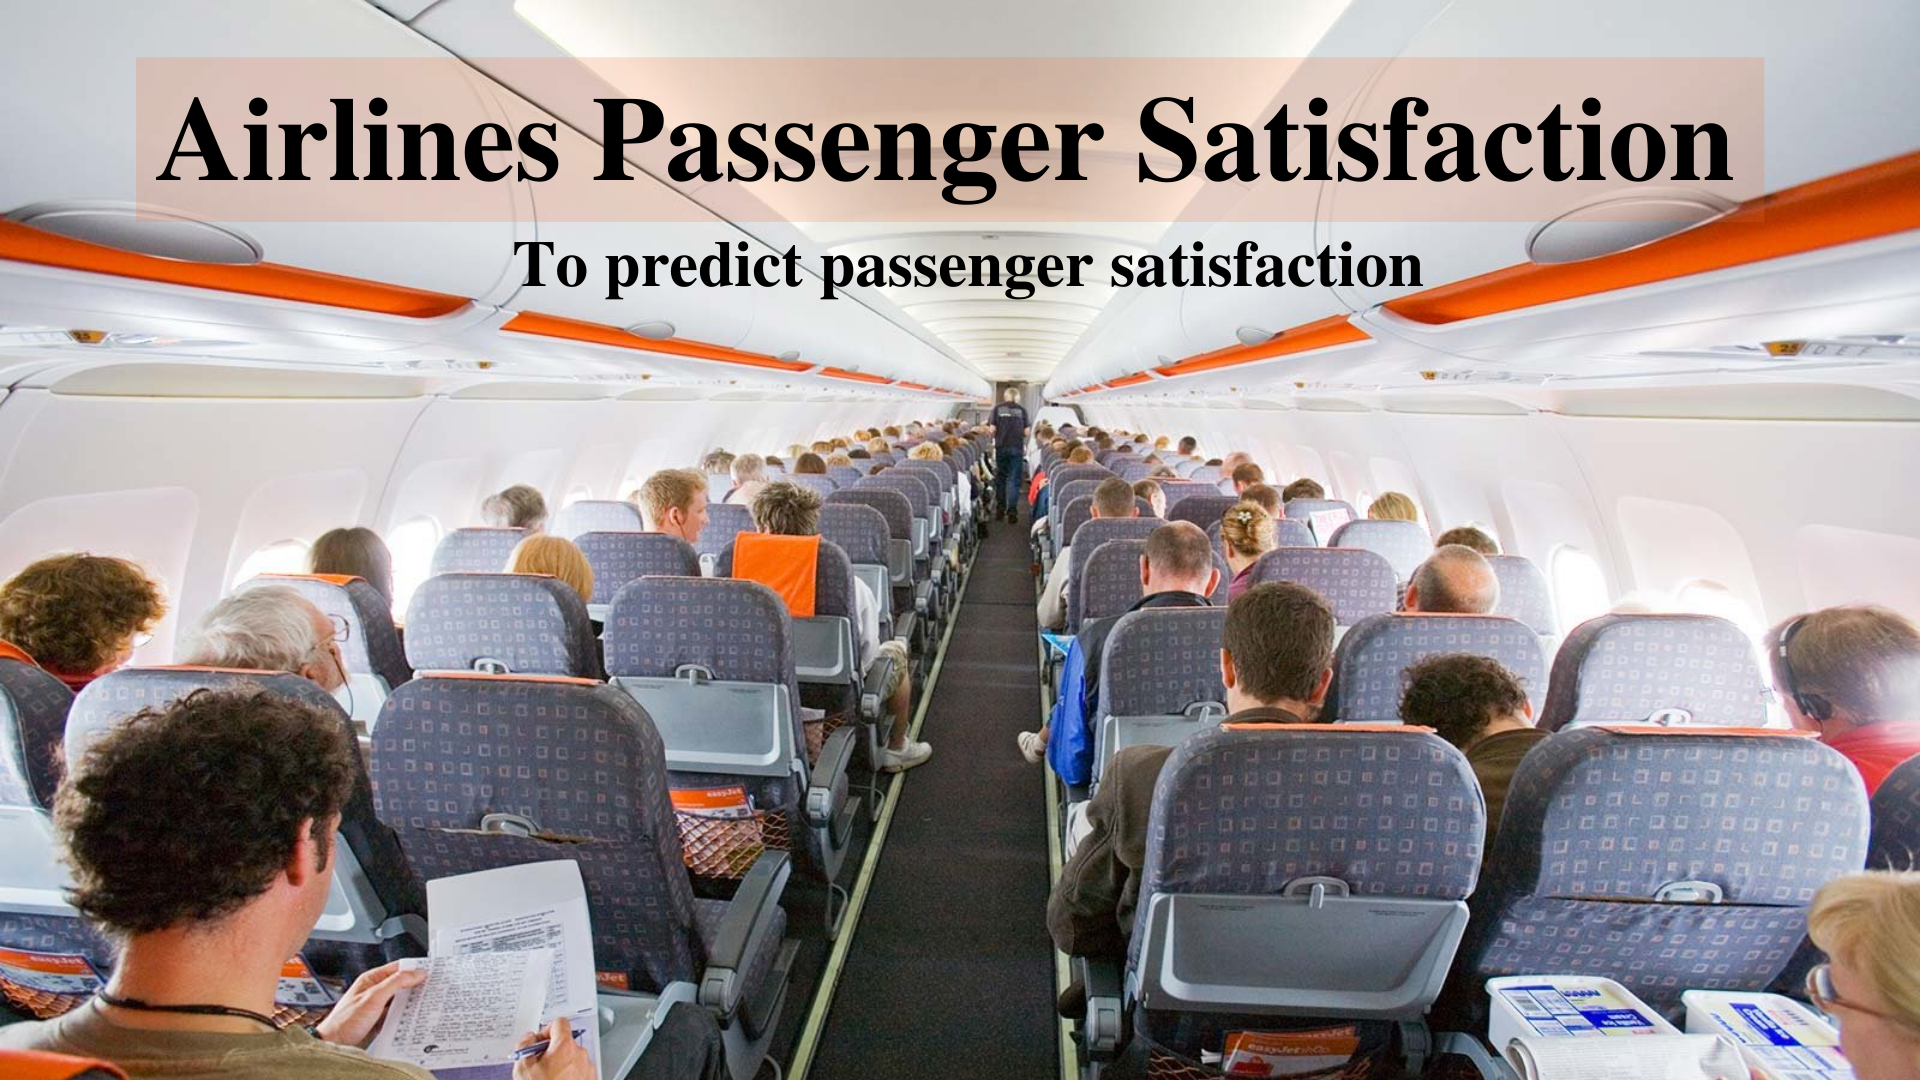

In [1]:
from IPython.display import Image
Image("Airlines Passenger Satisfaction.png")

### About the dataset:

#### The dataset has 24 columns and 103904 rows. The target column name that we aim to predict  is "Satisfaction"
#### The columns of the dataset are-

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>
from IPython.display import Image
Image("flowchart.png")

### Importing all necessary libraries

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder,StandardScaler
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.stats import shapiro
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

### Importing the dataset

In [4]:
data = pd.read_csv("train.csv",index_col=0)

In [5]:
data.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]

### Data cleaning

We remove the id column since it does not provide any valuable insights.

In [6]:
data.drop('id',axis=1,inplace=True)

In [7]:
data.shape

(103904, 23)

### Dealing with Missing values

We next check for missing values across our entire dataset

In [8]:
for i in data.columns:
    nan_counts = data[i].isna().sum()
    total = len(data[i])
    res = np.round(nan_counts/total,5)
    print('{0}% of missing value is found in {1} column'.format(res,i))

0.0% of missing value is found in Gender column
0.0% of missing value is found in Customer Type column
0.0% of missing value is found in Age column
0.0% of missing value is found in Type of Travel column
0.0% of missing value is found in Class column
0.0% of missing value is found in Flight Distance column
0.0% of missing value is found in Inflight wifi service column
0.0% of missing value is found in Departure/Arrival time convenient column
0.0% of missing value is found in Ease of Online booking column
0.0% of missing value is found in Gate location column
0.0% of missing value is found in Food and drink column
0.0% of missing value is found in Online boarding column
0.0% of missing value is found in Seat comfort column
0.0% of missing value is found in Inflight entertainment column
0.0% of missing value is found in On-board service column
0.0% of missing value is found in Leg room service column
0.0% of missing value is found in Baggage handling column
0.0% of missing value is found

We can see that there are 0.00298% missing values in the column "Arrival Delay in Minutes". We then check for the exact number of missing values

In [9]:
data['Arrival Delay in Minutes'].isna().sum()

310

310 missing values out of 100000 values does not seem like a lot. However we will check if the column follows Normal Distribution first.

In [10]:
alpha=0.05
stat, p = shapiro(data['Arrival Delay in Minutes'])
if p > alpha:
    print('Arrival Delay in Minutes feature follows Normal distribution')
else:
    print('Arrival Delay in Minutes feature "does not" follows Normal distribution') 

Arrival Delay in Minutes feature follows Normal distribution


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Since the columnn does follow normal distribution,we know that the maximum values lie in the range mean-SD and mean+SD. Therefore we substitute the missing values with random values existing in this range. 

In [11]:
avg_arv_time = data['Arrival Delay in Minutes'].mean()
std_arv_time = data['Arrival Delay in Minutes'].std()


for i,data2 in data.iterrows():  
    if pd.isnull(data2["Arrival Delay in Minutes"]): 
        r=np.random.uniform(avg_arv_time-std_arv_time, avg_arv_time+std_arv_time) 
        r=np.round(r,0) 
        data.at[i,"Arrival Delay in Minutes"]=r  

In [12]:
data['Arrival Delay in Minutes'].isna().sum()

0

We have successfully dealt with missing values

### Dealing with outliers

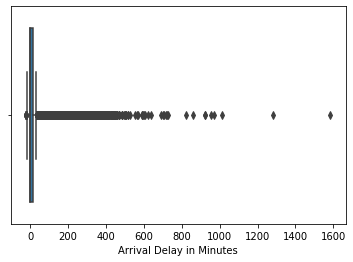

In [13]:
sns.boxplot(data['Arrival Delay in Minutes'])

We can see that there are considerable number of outliers. However we can accept a threshold delay of upto 600 minutes because the flight need not be on time always. We have considered 600 as a threshold delay and removed the rows where the delay is greater than 600 minutes.

In [14]:
data[data['Arrival Delay in Minutes']>600].shape

(18, 23)

In [15]:
data = data[data['Arrival Delay in Minutes']<=600]

In [16]:
data[data['Arrival Delay in Minutes']>600].shape

(0, 23)

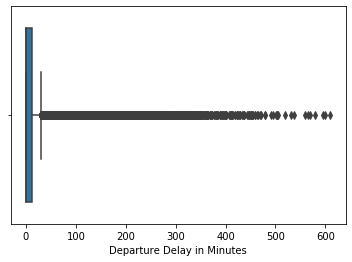

In [17]:
sns.boxplot(data['Departure Delay in Minutes'])

Since we had chosen 600 as threshold value for arrival delay in minutes and there are no values exceeding 600 in departure delay, we make no changes here.

The columns with ratings between 1-5 had few instances with 0 rating. The curator of the dataset has mentioned that 0 ratinng provides no insights whatsoever and hence we decided to remove them

In [18]:
rating_cols = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

In [19]:
for i in rating_cols:
    data = data[~(data[i]==0)]

There are columns that provide ratings for different services. Now these columns are categorical. However the values are by default read as integer so we convert them into categories here.

In [20]:
for col in rating_cols:
    data[col] = data[col].astype("category")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95688 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             95688 non-null  object  
 1   Customer Type                      95688 non-null  object  
 2   Age                                95688 non-null  int64   
 3   Type of Travel                     95688 non-null  object  
 4   Class                              95688 non-null  object  
 5   Flight Distance                    95688 non-null  int64   
 6   Inflight wifi service              95688 non-null  category
 7   Departure/Arrival time convenient  95688 non-null  category
 8   Ease of Online booking             95688 non-null  category
 9   Gate location                      95688 non-null  category
 10  Food and drink                     95688 non-null  category
 11  Online boarding                    95688

### Data visualization

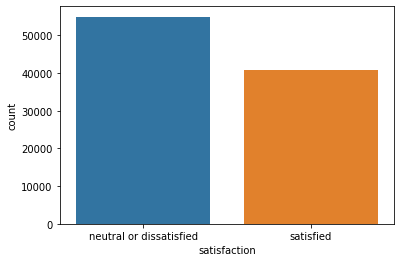

In [22]:
sns.countplot(data['satisfaction'])

The data is slightly imbalanced. We will have to deal with this later on during data modeling.

In [23]:
print("Select through the drop down menu to view related pie charts.")
fig = go.Figure()
col_list = ['Gender','Customer Type','Type of Travel', 'Class']
for col in col_list:
    temp = dict(data[col].value_counts())
    fig.add_trace(
      go.Pie(
          labels = list(temp.keys()),
          values =  list(temp.values())
      )
  )

fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'Gender',
                  method = 'update',
                  args = [{'visible': [True, False, False, False]}, 
                          {'title': 'Gender',
                           'showlegend':True}]),
             dict(label = 'Customer Type',
                  method = 'update',
                  args = [{'visible': [False, True, False, False]},
                          {'title': 'Customer Type',
                           'showlegend':True}]),
             dict(label = 'Type of Travel',
                  method = 'update',
                  args = [{'visible': [False,False, True, False]},
                          {'title': 'Type of Travel',
                           'showlegend':True}]),
             dict(label = 'Class',
                  method = 'update',
                  args = [{'visible': [False, False,False,True]},
                          {'title': 'Class',
                           'showlegend':True}]),
            ])
        )
    ])

fig.show()

Select through the drop down menu to view related pie charts.


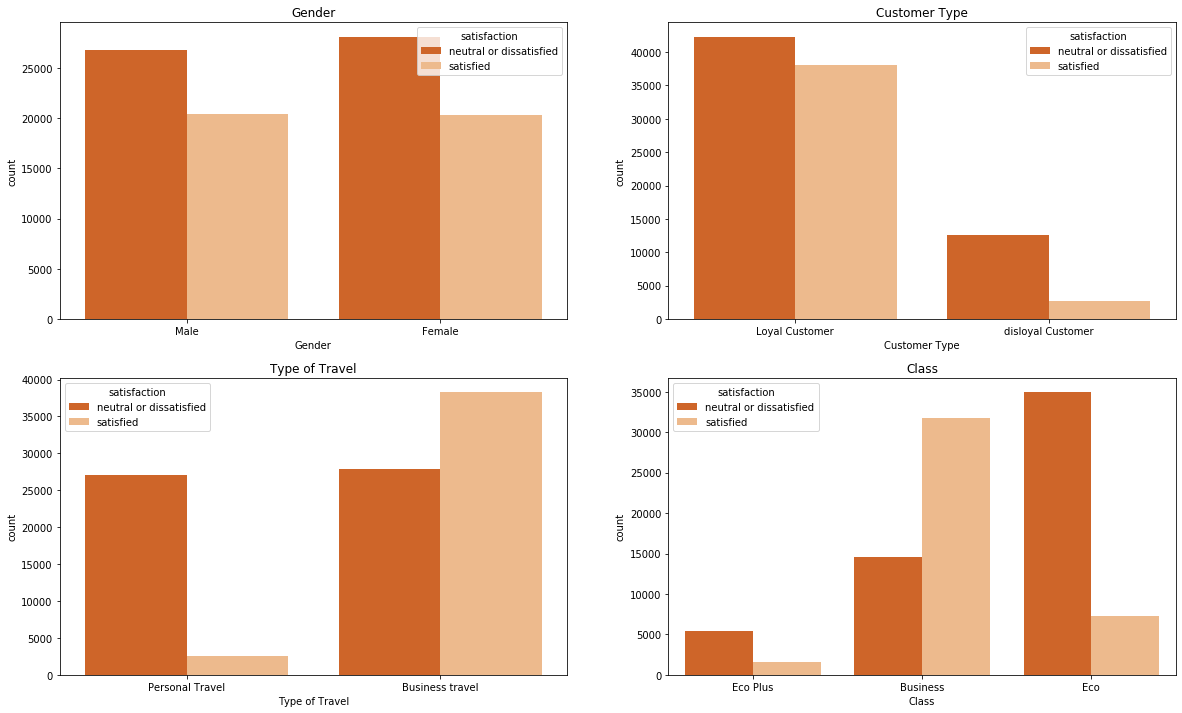

In [24]:
fig, axis = plt.subplots(2, 2, figsize=(20,12))
axis[0,0].set_title('Gender')
axis[0,1].set_title('Customer Type')
axis[1,0].set_title('Type of Travel')
axis[1,1].set_title('Class')

sns.countplot(x = 'Gender', hue = 'satisfaction', data = data, palette = 'Oranges_r',ax=axis[0,0])
sns.countplot(x = 'Customer Type', hue = 'satisfaction', data = data, palette = 'Oranges_r',ax=axis[0,1])
sns.countplot(x = 'Type of Travel', hue = 'satisfaction', data = data, palette = 'Oranges_r',ax=axis[1,0])
sns.countplot(x = 'Class', hue = 'satisfaction', data = data, palette = 'Oranges_r',ax=axis[1,1])
plt.show()

These are countplots for the categorical columns in our dataset. We can observe the following

1) Gender has no affect on a passenger being satisfied or dissatisfied.

2) A loyal customer is more likely to be satisfied where as a disloyal customer is more likely to be dissatisfied by an airline

3) People who travel for personal reasons tend to be mostly dissatisfied whereas people travelling for business purposes are slightly more inclined towards being satisfied by the airlines

4) A bperson travelling through business class is more likely to be satisfied with the airlines than a person travelling in economy or economy plus.

We next create a derived column call 'Age categories' from original column 'Age' where the age values are segregated into 5 categories.

In [25]:
data['Age Categories'] = pd.cut(data['Age'],5)

We next use Label Encoder to encode our target column 'Satisfaction' and store the values in a new colummn 'Target'

In [26]:
target_encoder = LabelEncoder()
data['target'] = target_encoder.fit_transform(data['satisfaction'])

Text(0, 0.5, 'Percentage of satisfied people')


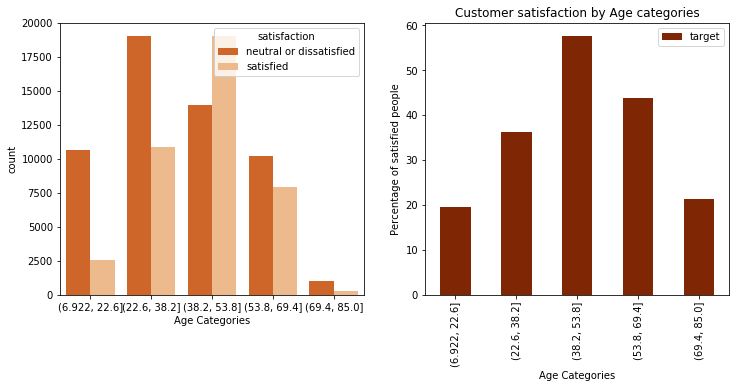

In [27]:
fig, axis = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(x = 'Age Categories', hue = 'satisfaction', data = data, palette = 'Oranges_r',ax=axis[0])
print((data[['Age Categories','target']].groupby('Age Categories').mean()*100)
      .plot(kind='bar',title="Customer satisfaction by Age categories",colormap="Oranges_r",ax=axis[1])
     .set_ylabel("Percentage of satisfied people"))
plt.show()

From the above plots we can obsrve that the middle aged crowd of passengers (38.2-53.8 years) are more likely to be satisfied by the airlines services.

We divide the values under the 'Flight Distance' column into 5 categories and store them in a new column 'Flight Distance Category'

In [28]:
data['Flight Distance category'] = pd.cut(data['Flight Distance'],5)

Text(0, 0.5, 'Percentage of satisfied people')


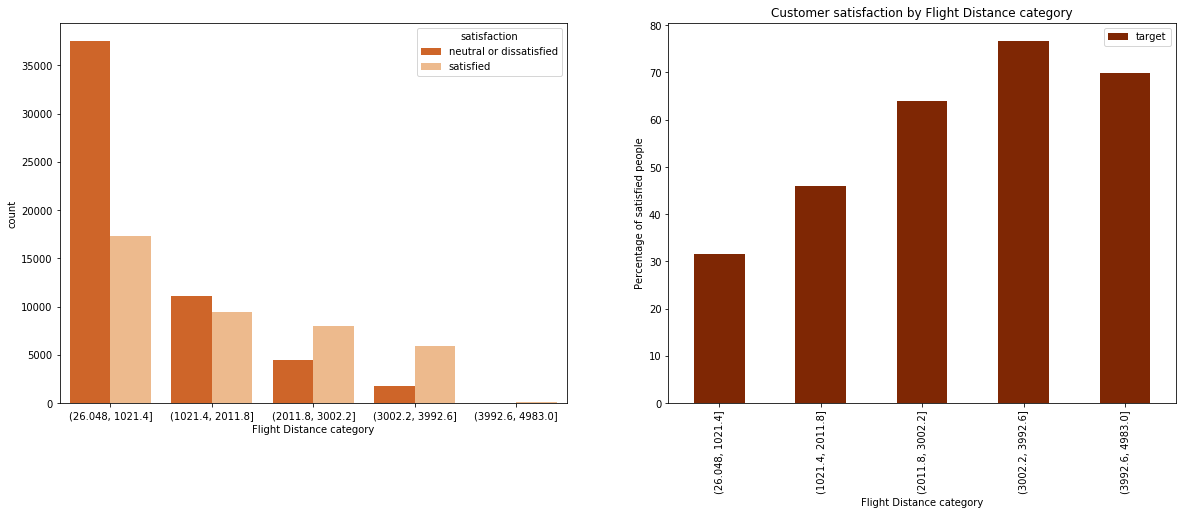

In [29]:
fig, axis = plt.subplots(1, 2, figsize=(20,7))
sns.countplot(x = 'Flight Distance category', hue = 'satisfaction', data = data, palette = 'Oranges_r',ax=axis[0])
print((data[['Flight Distance category','target']].groupby('Flight Distance category').mean()*100)
      .plot(kind='bar',title="Customer satisfaction by Flight Distance category",colormap="Oranges_r",ax=axis[1])
     .set_ylabel("Percentage of satisfied people"))
plt.show()

From the above plots we can conclude that percentage of people travelling for short distances are least satisfied and people travelling for roughly 3000-4000 distances have the highest percentage of satisfied people.

In [30]:
facilities=['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
        'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
print("Select any Facility")
@interact(Facility=facilities)
def details(Facility):
    fig, axis = plt.subplots(1, 2, figsize=(12,5))
    sns.countplot(x = Facility, hue = 'satisfaction', data = data, palette = 'Oranges_r',ax=axis[0])
    print((data[[Facility,'target']].groupby(Facility).mean()*100)
      .plot(kind='bar',title="Customer satisfaction by {}".format(Facility),colormap="Oranges_r",ax=axis[1])
     .set_ylabel("Percentage of satisfied people"))
    plt.show()

Select any Facility


interactive(children=(Dropdown(description='Facility', options=('Inflight wifi service', 'Departure/Arrival ti…

Select various features using the drop down menu to view their respective plots. We have plotted a count plot of a feature v/s satisfaction column and feature v/s percentage of satisfied people. Following are the insights we derive -

1)Inflight Wifi service - The plots show us that the better the wifi service the more likely is the person to be satisfied. Infact almost all the people who have rated 5 are satisfied.

2) Departure/Arrival time convenient - There is no direct link between time convenience and a passenger's satisfaction with airlines because there is a large number of people who are dissatisfied even though they have rated time convenience as 4 or 5.

3) Ease of Online Booking - Satisfaction is impacted by ease of online booking slightly because higher ratings have higher percentage of satisfied passengers.

4) Food and Drink - The better the food and drink service, the more likely is the passenger to be satisfied by the airlines.

5) Online boarding - Online boarding highly impacts the satisfaction of passengers. The higher the ratings here, the more likely is the passenger to be satisfied by the airlines

6) Seat comfort - The better the seat comfort the airline offers, the better chances it has for its passenger to be satisfied with the services.

7) Inflight entertainment - It can be seen that higher ratings of 4 and 5 have higher percentage of satisfied people.

8) Onboard service - This impacts passenger satisfaction directly. The better the onboard services, the higher the chances for the passenger to be satisfied with the services.

9) Leg room service - The better the leg room service, the more likely are passengers to be satisfied with the the airllines services.

10) Baggage handling - Badly handled baggages leads to dissatisfied passengers.

11) Checkin service - If the checkin service is not good, the passengers are likely to be dissatisfied with the services. 

12) Inflight service - The passengers rating inflight services a full 5 are more likely to be satisfied with the the airllines services.

13) Cleanliness - The passengers rating cleanliness highly are more likely to be satisfied with the the airllines services.

In [31]:
data = data.drop(['Age Categories','Flight Distance category'],axis=1)

We drop the 'Satisfaction' column because we have derived a new column 'Target' from it. We drop 'Age Categories' and 'Flight Distance category' because we had created them only for the sake of visualization.

### Contingency Tables

A contingency table is a table showing the distribution of one variable in rows and another variable in columns. It is used to study the correlation between the two variables. It is a multiway table which describes a dataset in which each observation belongs to one category for each of several variables. Also It is basically a tally of counts between two or more categorical variables. Contingency tables are also called crosstabs or two-way tables,used in statistics to summarize the relationship between several categorical variables.

#### 1- Customer Type and Satisfaction

In [32]:
print("Contingency Table =>")
contingency= pd.crosstab(data['Customer Type'], data['satisfaction']) 
contingency

Contingency Table =>


satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                       42317      37988
disloyal Customer                    12619       2764

In [33]:

print("P-value =>")
c, p, dof, expected = chi2_contingency(contingency) 
# Print the p-value
print(p)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value =>
0.0
p value is 0.0
Dependent (reject H0)


We conclude that a customer's satisfaction is dependent on Customer Type

#### 2- Type of Travel and Satisfaction

In [34]:
print("Contingency Table =>")
contingency= pd.crosstab(data['Type of Travel'], data['satisfaction']) 
contingency

Contingency Table =>


satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                    27832      38263
Personal Travel                    27104       2489

In [35]:
print("P-value =>")
c, p, dof, expected = chi2_contingency(contingency) 
# Print the p-value
print(p)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value =>
0.0
p value is 0.0
Dependent (reject H0)


We conclude that a customer's satisfaction is dependent on Type of Travel.

#### 3- Class and Satisfaction

In [36]:
print("Contingency Table =>")
contingency= pd.crosstab(data['Class'], data['satisfaction']) 
contingency

Contingency Table =>


satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                        14634      31820
Eco                             34941       7294
Eco Plus                         5361       1638

In [37]:
print("P-value =>")
c, p, dof, expected = chi2_contingency(contingency) 
# Print the p-value
print(p)
alpha = 0.05
print("p value is " ,p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value =>
0.0
p value is  0.0
Dependent (reject H0)


We conclude that a customer's satisfaction is dependent on Class.

### Feature Engeneering

In [38]:
Gender_encoder = LabelEncoder()
Customer_Type_encoder = LabelEncoder()
Type_of_Travel_encoder = LabelEncoder()
Class_encoder = LabelEncoder()

In [39]:
data['Gender'] = Gender_encoder.fit_transform(data['Gender'])
data['Customer Type'] = Customer_Type_encoder.fit_transform(data['Customer Type'])
data['Type of Travel'] = Type_of_Travel_encoder.fit_transform(data['Type of Travel'])
data['Class'] = Class_encoder.fit_transform(data['Class'])

### Feature Selection

In [40]:
X = data.drop(['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','target','satisfaction'],axis=1)
y = data['target']

Among all the columns that provide user ratings, we aim at finding the most important ones.

In [41]:
X.head()

Gender  Customer Type  Type of Travel  Class Inflight wifi service  \
0       1              0               1      2                     3   
1       1              1               0      0                     3   
2       0              0               0      0                     2   
3       0              0               0      0                     2   
4       1              0               0      0                     3   

  Departure/Arrival time convenient Ease of Online booking Gate location  \
0                                 4                      3             1   
1                                 2                      3             3   
2                                 2                      2             2   
3                                 5                      5             5   
4                                 3                      3             3   

  Food and drink Online boarding Seat comfort Inflight entertainment  \
0              5               3            5                      5   
1              1               3            1                      1   
2              5               5            5                      5   
3              2               2            2                      2   
4              4               5            5                      3   

  On-board service Leg room service Baggage handling Checkin service  \
0                4                3                4               4   
1                1                5                3               1   
2                4                3                4               4   
3                2                5                3               1   
4                3                4                4               3   

  Inflight service Cleanliness  
0                5           5  
1                4           1  
2                4           5  
3                4           2  
4                3           3

In [42]:
predictors = X.head(0)
selector = SelectKBest(chi2,k=5)
sf_fit = selector.fit(X,y)

In [43]:
c=[]
sf=[]
for i in range(len(sf_fit.scores_)):
    print(X.columns[i],":",sf_fit.scores_[i])
    c.append(X.columns[i])
    sf.append(sf_fit.scores_[i])

Gender : 7.466765003018629
Customer Type : 3813.6837543556735
Type of Travel : 14137.809213026387
Class : 13018.120612820425
Inflight wifi service : 7452.128479673697
Departure/Arrival time convenient : 184.47968478301874
Ease of Online booking : 2968.591707229931
Gate location : 1.2231000061352433
Food and drink : 2686.522987822026
Online boarding : 14881.058366818379
Seat comfort : 6702.3304878075705
Inflight entertainment : 9539.222979751114
On-board service : 5702.88291003893
Leg room service : 5652.136538153498
Baggage handling : 2674.8727690663254
Checkin service : 2751.8558556213593
Inflight service : 2559.9335006929405
Cleanliness : 5341.550465043163


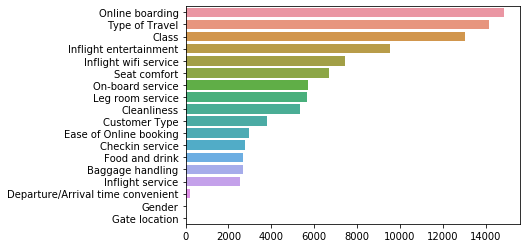

In [44]:
sf=pd.Series(sf)
sf.index=X.columns
sf.index
sf=sf.sort_values(ascending=False)
sns.barplot(y=sf.index,x=sf)

We can see that the last 3 colums do not affect our target variable greatly, hence we choose to drop these columns

In [45]:
data=data.drop(['Gate location','Gender','Departure/Arrival time convenient','satisfaction'],axis=1)

In [46]:
data.head()

Customer Type  Age  Type of Travel  Class  Flight Distance  \
0              0   13               1      2              460   
1              1   25               0      0              235   
2              0   26               0      0             1142   
3              0   25               0      0              562   
4              0   61               0      0              214   

  Inflight wifi service Ease of Online booking Food and drink Online boarding  \
0                     3                      3              5               3   
1                     3                      3              1               3   
2                     2                      2              5               5   
3                     2                      5              2               2   
4                     3                      3              4               5   

  Seat comfort Inflight entertainment On-board service Leg room service  \
0            5                      5                4                3   
1            1                      1                1                5   
2            5                      5                4                3   
3            2                      2                2                5   
4            5                      3                3                4   

  Baggage handling Checkin service Inflight service Cleanliness  \
0                4               4                5           5   
1                3               1                4           1   
2                4               4                4           5   
3                3               1                4           2   
4                4               3                3           3   

   Departure Delay in Minutes  Arrival Delay in Minutes  target  
0                          25                      18.0       0  
1                           1                       6.0       0  
2                           0                       0.0       1  
3                          11                       9.0       0  
4                           0                       0.0       1

In [47]:
X = data.drop('target',axis = 1)
y = data['target']

In [48]:
X

Customer Type  Age  Type of Travel  Class  Flight Distance  \
0                   0   13               1      2              460   
1                   1   25               0      0              235   
2                   0   26               0      0             1142   
3                   0   25               0      0              562   
4                   0   61               0      0              214   
...               ...  ...             ...    ...              ...   
103899              1   23               0      1              192   
103900              0   49               0      0             2347   
103901              1   30               0      0             1995   
103902              1   22               0      1             1000   
103903              0   27               0      0             1723   

       Inflight wifi service Ease of Online booking Food and drink  \
0                          3                      3              5   
1                          3                      3              1   
2                          2                      2              5   
3                          2                      5              2   
4                          3                      3              4   
...                      ...                    ...            ...   
103899                     2                      2              2   
103900                     4                      4              2   
103901                     1                      1              4   
103902                     1                      1              1   
103903                     1                      3              1   

       Online boarding Seat comfort Inflight entertainment On-board service  \
0                    3            5                      5                4   
1                    3            1                      1                1   
2                    5            5                      5                4   
3                    2            2                      2                2   
4                    5            5                      3                3   
...                ...          ...                    ...              ...   
103899               2            2                      2                3   
103900               4            5                      5                5   
103901               1            5                      4                3   
103902               1            1                      1                4   
103903               1            1                      1                1   

       Leg room service Baggage handling Checkin service Inflight service  \
0                     3                4               4                5   
1                     5                3               1                4   
2                     3                4               4                4   
3                     5                3               1                4   
4                     4                4               3                3   
...                 ...              ...             ...              ...   
103899                1                4               2                3   
103900                5                5               5                5   
103901                2                4               5                5   
103902                5                1               5                4   
103903                1                4               4                3   

       Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
0                5                          25                      18.0  
1                1                           1                       6.0  
2                5                           0                       0.0  
3                2                          11                       9.0  
4                3                           0                       0.0  
..

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=30))

#### Cross validation

In [50]:
cross_val = cross_val_score(pipeline,X,y,cv=10)

In [51]:
print('Cross Validation Score : ',cross_val.mean()*100)

Cross Validation Score :  96.02353678055987


### Train - Test Split

We split the data before encoding to prevent data leakage

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(76550, 19)
(19138, 19)
(76550,)
(19138,)


### Encoding

We do have 4 columns that consist of numerical data. We check if these columns follow normal distribution using shapiro test.

In [54]:
numerical_data=['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
alpha = 0.05

for nd in numerical_data:
    stat, p = shapiro(data[nd])
    if p > alpha:
        print('{0} feature follows Normal distribution'.format(nd))
        print(" ")
    else:
        print('{0} feature "does not" follows Normal distribution'.format(nd))
        print(" ")

Age feature "does not" follows Normal distribution
 
Flight Distance feature "does not" follows Normal distribution
 
Departure Delay in Minutes feature "does not" follows Normal distribution
 
Arrival Delay in Minutes feature "does not" follows Normal distribution
 


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



We have made use of Standard Scaler to resize the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1. StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure. StandardScaler removes the mean and scales the data to the unit variance.

In [55]:
scaler = StandardScaler()

In [56]:
data.head(2)

Customer Type  Age  Type of Travel  Class  Flight Distance  \
0              0   13               1      2              460   
1              1   25               0      0              235   

  Inflight wifi service Ease of Online booking Food and drink Online boarding  \
0                     3                      3              5               3   
1                     3                      3              1               3   

  Seat comfort Inflight entertainment On-board service Leg room service  \
0            5                      5                4                3   
1            1                      1                1                5   

  Baggage handling Checkin service Inflight service Cleanliness  \
0                4               4                5           5   
1                3               1                4           1   

   Departure Delay in Minutes  Arrival Delay in Minutes  target  
0                          25                      18.0       0  
1                           1                       6.0       0

In [57]:
x_train

Customer Type  Age  Type of Travel  Class  Flight Distance  \
40836              0   47               0      0             1262   
78588              0   43               0      0             2279   
98620              0   27               0      0             1727   
26689              0   44               0      0              631   
65906              0   44               0      0             2392   
...              ...  ...             ...    ...              ...   
23061              1   13               0      1              860   
49854              0   55               0      0             2227   
46284              1   23               0      1              134   
47318              1   24               0      1              919   
74142              0   30               0      1              121   

      Inflight wifi service Ease of Online booking Food and drink  \
40836                     1                      3              4   
78588                     2                      2              4   
98620                     3                      3              5   
26689                     5                      5              2   
65906                     1                      2              3   
...                     ...                    ...            ...   
23061                     2                      2              5   
49854                     4                      3              3   
46284                     4                      4              4   
47318                     4                      4              2   
74142                     5                      2              5   

      Online boarding Seat comfort Inflight entertainment On-board service  \
40836               4            4                      1                1   
78588               4            4                      4                4   
98620               5            5                      5                4   
26689               5            4                      5                5   
65906               1            2                      1                1   
...               ...          ...                    ...              ...   
23061               2            5                      5                3   
49854               4            3                      4                4   
46284               4            4                      4                5   
47318               4            2                      2                3   
74142               5            5                      5                1   

      Leg room service Baggage handling Checkin service Inflight service  \
40836                1                1               2                1   
78588                4                4               3                4   
98620                5                5               5                5   
26689                5                5               4                5   
65906                1                1               3                1   
...                ...              ...             ...              ...   
23061                1                3               2                3   
49854                4                4               3                4   
46284                3                4               5                4   
47318                4                4               5                5   
74142                1                4               2                3   

      Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
40836           2                           0                       0.0  
78588           5                           0                       0.0  
98620           5                           0                      10.0  
26689           5                           0                       3.0  
65906           3                           0                       0.0  
...           ...                         ...          

In [58]:
x_train['Age'] = scaler.fit_transform(np.array(x_train['Age']).reshape(-1,1))
x_test['Age'] = scaler.transform(np.array(x_test['Age']).reshape(-1,1))

x_train['Flight Distance'] = scaler.fit_transform(np.array(x_train['Flight Distance']).reshape(-1,1))
x_test['Flight Distance'] = scaler.transform(np.array(x_test['Flight Distance']).reshape(-1,1))

x_train['Departure Delay in Minutes'] = scaler.fit_transform(np.array(x_train['Departure Delay in Minutes']).reshape(-1,1))
x_test['Departure Delay in Minutes'] = scaler.transform(np.array(x_test['Departure Delay in Minutes']).reshape(-1,1))

x_train['Arrival Delay in Minutes'] = scaler.fit_transform(np.array(x_train['Arrival Delay in Minutes']).reshape(-1,1))
x_test['Arrival Delay in Minutes'] = scaler.transform(np.array(x_test['Arrival Delay in Minutes']).reshape(-1,1))

### Data Modeling

We have used 3 models - Decision Tree Classifier, Random Forest Classifier and Gradient Boosting Classifier

#### Decision Tree Classifier

Accuracy of Decision Tree Classifier =>  94.17 %
Precision score of Decision Tree Classifier => 92.76
Recall score of Decision Tree Classifier => 93.47
f1 score of Decision Tree Classifier => 93.11

Confusion Matrix => 


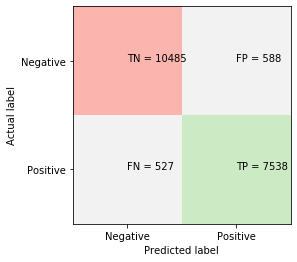

ROC Curve =>


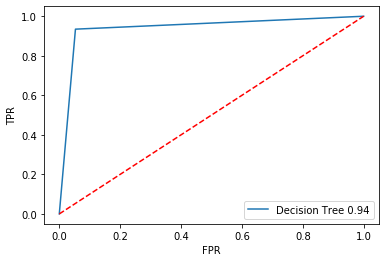

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
prediction = dtc.predict(x_test)
print("Accuracy of Decision Tree Classifier => ", np.round(accuracy_score(y_test,prediction)*100,2),"%")

precision = (precision_score(y_test,prediction))*100
print("Precision score of Decision Tree Classifier =>",np.round(precision,2))    
dtc_precision = np.round(precision,2)


recall = recall_score(y_test,prediction)*100
print("Recall score of Decision Tree Classifier =>",np.round(recall,2))    
f1 = f1_score(y_test,prediction)*100
print("f1 score of Decision Tree Classifier =>",np.round(f1,2))     
print("")
print("Confusion Matrix => ")

cm = confusion_matrix(y_test,prediction)
plt.clf()
plt.imshow(cm,cmap=plt.cm.Pastel1_r)
classname=['Negative','Positive']
tick_marks = np.arange(len(classname))
plt.xticks(tick_marks,classname)
plt.yticks(tick_marks,classname)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]))
        
plt.show()

print("ROC Curve =>")
fpr, tpr, threshold = roc_curve(y_test,prediction)
lr_roc_auc =roc_auc_score(y_test,prediction)
plt.figure()
plt.plot(fpr,tpr,label="Decision Tree {}".format(round(lr_roc_auc,2)))
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

### Confusion Matrix

##### TP - The passenger is satisfied and model has predicted it as satisfied
##### TN - The passenger is dissatisfied and model has predicted it as dissatisfied
##### FP - The passenger is dissatisfied and model has predicted it as satisfied
##### FN - The passenger is satisfied and model has predicted it as dissatisfied

### Model Evaluation

#### IF our dataset is imbalaned, then we can't really evaluate our model on basis of Accuracy. We have to check Precision Recall and F1 score
![](precision,recall.png)
![](f1.png)

Precision is a good measure to determine, when the costs of False Positive is high. For instance, airlines passenger satisfaction. In airlines passenger satisfaction, a false positive means that the passenger who was dissatisfied(actual negative) with the service has been categorized as satisfied. The airlines may fail in taking necessary measures to improve its service and result in loss of potential customers.

Recall is a good measure to determine, when there is a high cost associated with False Negative.
For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

### ROC Curve
#### An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 
#### The area under the curve of blue lines should be more

#### Random Forest Classifier

Accuracy of Random Forest Classifier =>  96.0 %
Precision score of Random Forest Classifier => 96.93
Recall score of Random Forest Classifier => 93.47
f1 score of Random Forest Classifier => 95.16

Confusion Matrix => 


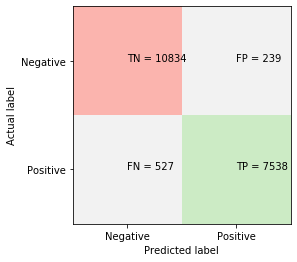

ROC Curve =>


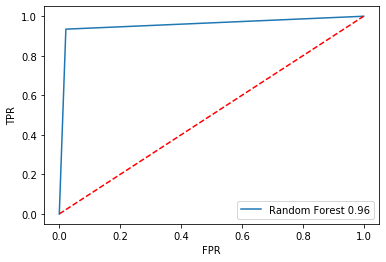

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(x_train, y_train)
prediction = rfc.predict(x_test)
print("Accuracy of Random Forest Classifier => ", np.round(accuracy_score(y_test,prediction)*100,2),"%")

precision = (precision_score(y_test,prediction))*100
print("Precision score of Random Forest Classifier =>",np.round(precision,2))  

rfc_precision = np.round(precision,2)

recall = recall_score(y_test,prediction)*100
print("Recall score of Random Forest Classifier =>",np.round(recall,2))    
f1 = f1_score(y_test,prediction)*100
print("f1 score of Random Forest Classifier =>",np.round(f1,2))     
print("")
print("Confusion Matrix => ")
cm = confusion_matrix(y_test,prediction)
plt.clf()
plt.imshow(cm,cmap=plt.cm.Pastel1_r)
classname=['Negative','Positive']
tick_marks = np.arange(len(classname))
plt.xticks(tick_marks,classname)
plt.yticks(tick_marks,classname)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]))
        
plt.show()

print("ROC Curve =>")

fpr, tpr, threshold = roc_curve(y_test,prediction)
lr_roc_auc =roc_auc_score(y_test,prediction)
plt.figure()
plt.plot(fpr,tpr,label="Random Forest {}".format(round(lr_roc_auc,2)))
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

#### Gradient Boosting Classifier

Accuracy of GradientBoostingClassifier =>  88.96 %
Precision score of GradientBoostingClassifier => 87.35
Recall score of GradientBoostingClassifier => 86.31
f1 score of GradientBoostingClassifier => 86.83

Confusion Matrix => 


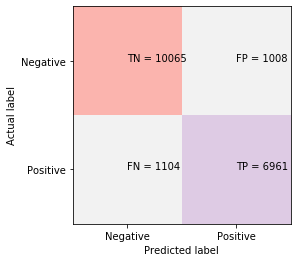

ROC Curve =>


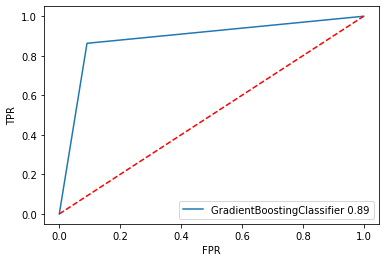

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,max_depth=3)
gbc.fit(x_train, y_train)
prediction = gbc.predict(x_test)
print("Accuracy of GradientBoostingClassifier => ", np.round(accuracy_score(y_test,prediction)*100,2),"%")

precision = (precision_score(y_test,prediction))*100
print("Precision score of GradientBoostingClassifier =>",np.round(precision,2))    
gbc_precision = np.round(precision,2)


recall = recall_score(y_test,prediction)*100
print("Recall score of GradientBoostingClassifier =>",np.round(recall,2))    
f1 = f1_score(y_test,prediction)*100
print("f1 score of GradientBoostingClassifier =>",np.round(f1,2))     
print("")
print("Confusion Matrix => ")

cm = confusion_matrix(y_test,prediction)
plt.clf()
plt.imshow(cm,cmap=plt.cm.Pastel1_r)
classname=['Negative','Positive']
tick_marks = np.arange(len(classname))
plt.xticks(tick_marks,classname)
plt.yticks(tick_marks,classname)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]))
        
plt.show()

print("ROC Curve =>")
fpr, tpr, threshold = roc_curve(y_test,prediction)
lr_roc_auc =roc_auc_score(y_test,prediction)
plt.figure()
plt.plot(fpr,tpr,label="GradientBoostingClassifier {}".format(round(lr_roc_auc,2)))
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

## Conclusion
#### As mentioned earlier, we will be evaluating our models on the basis of accuracy as well as precision. Since precision is more vital to us in our scenario. 

In [62]:
pd.DataFrame({'Classifier':['Decison Tree','Random Forest','Gradient Boosting'],'Precision score':[dtc_precision,rfc_precision,
                                                                                            gbc_precision]})

Classifier  Precision score
0       Decison Tree            92.76
1      Random Forest            96.93
2  Gradient Boosting            87.35

### Among all the three models, Random Forest has the highest accuracy(95.43%)  and precision (97.64).

In [63]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(Gender_encoder,open('Gender_encoder.pkl','wb'))
pickle.dump(Customer_Type_encoder,open('Customer_Type_encoder.pkl','wb'))
pickle.dump(Type_of_Travel_encoder,open('Type_of_Travel_encoder.pkl','wb'))
pickle.dump(Class_encoder,open('Class_encoder.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

### Live deployement on herouku cloud
https://airpassenger-satisfaction.herokuapp.com